In [2]:
from utils import conv
from utils import neural_network as nn
from utils import dataprepare as dp

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# Example kernels
sobel_h_kernel = np.array([[-1, -1, -1],
                           [ 0,  0,  0],
                           [ 1,  1,  1]])
sobel_v_kernel = sobel_h_kernel.T

sharp_kernel = np.array([[-1, -1, -1],
                         [-1,  9, -1],
                         [-1, -1, -1]])

smooth_kernel = np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]])/9

gaussian_blur_kernel = np.array([[1/16, 1/8, 1/16],
                                 [1/8, 1/4, 1/8],
                                 [1/16, 1/8, 1/16]])

ori_gaussian_kernel = np.array([[21, 31, 21],
                                [31, 48, 31],
                                [21, 31, 21]])/256

gaussian_kernel = np.array([[21, 31, 21],
                            [31, 48, 31],
                            [21, 31, 21]])/200
gaussian_kernel = gaussian_kernel*1.05
# Define the list of kernels
kernel = [gaussian_kernel]

In [4]:
kernel

[array([[0.11025, 0.16275, 0.11025],
        [0.16275, 0.252  , 0.16275],
        [0.11025, 0.16275, 0.11025]])]

In [5]:
def extract1(image):
    k = 0
    conv1 = conv.convolve2d(image, kernel[k])
    conv2 = conv.convolve2d(conv1, kernel[k])
    pool1 = conv.max_pooling(conv2).astype(np.uint8)
    # block encoder 2
    conv3 = conv.convolve2d(pool1, kernel[k])
    conv4 = conv.convolve2d(conv3, kernel[k])
    pool2 = conv.max_pooling(conv4).astype(np.uint8)
    # block encoder 3
    conv5 = conv.convolve2d(pool2, kernel[k])
    conv6 = conv.convolve2d(conv5, kernel[k])
    conv7 = conv.convolve2d(conv6, kernel[k])
    pool3 = conv.max_pooling(conv7).astype(np.uint8)
    # block encoder 4
    conv8 = conv.convolve2d(pool3, kernel[k])
    conv9 = conv.convolve2d(conv8, kernel[k])
    conv10 = conv.convolve2d(conv9, kernel[k])
    pool4 = conv.max_pooling(conv10).astype(np.uint8)
    # block encoder 5
    conv11 = conv.convolve2d(pool4, kernel[k])
    conv12 = conv.convolve2d(conv11, kernel[k])
    conv13 = conv.convolve2d(conv12, kernel[k])
    pool5 = conv.max_pooling(conv13).astype(np.uint8)
    # block decoder 1
    # Generating random mask for max unpooling
    pool_size = (2, 2)
    stride = (2, 2)
    mask1 = np.random.randint(0, pool_size[0]*pool_size[1], size=pool5.shape)
    # Max unpooling
    unpooled1 = conv.max_unpooling(pool5, mask1, stride, conv13.shape).astype(np.uint8)
    conv14 = conv.convolve2d(unpooled1, kernel[k])
    conv15 = conv.convolve2d(conv14, kernel[k])
    conv16 = conv.convolve2d(conv15, kernel[k])
    # block decoder 2
    mask2 = np.random.randint(0, pool_size[0]*pool_size[1], size=pool4.shape)
    unpooled2 = conv.max_unpooling(pool4, mask2, stride, conv10.shape).astype(np.uint8)
    conv17 = conv.convolve2d(unpooled2, kernel[k])
    conv18 = conv.convolve2d(conv17, kernel[k])
    conv19 = conv.convolve2d(conv18, kernel[k])
    # block decoder 3
    mask3 = np.random.randint(0, pool_size[0]*pool_size[1], size=pool3.shape)
    unpooled3 = conv.max_unpooling(pool3, mask3, stride, conv7.shape).astype(np.uint8)
    conv20 = conv.convolve2d(unpooled3, kernel[k])
    conv21 = conv.convolve2d(conv20, kernel[k])
    conv22 = conv.convolve2d(conv21, kernel[k])
    # block decoder 4
    mask4 = np.random.randint(0, pool_size[0]*pool_size[1], size=pool2.shape)
    unpooled4 = conv.max_unpooling(pool2, mask4, stride, conv4.shape).astype(np.uint8)
    conv23 = conv.convolve2d(unpooled4, kernel[k])
    conv24 = conv.convolve2d(conv23, kernel[k])
    # block decoder 5
    mask5 = np.random.randint(0, pool_size[0]*pool_size[1], size=pool1.shape)
    unpooled5 = conv.max_unpooling(pool1, mask5, stride, conv2.shape).astype(np.uint8)
    conv25 = conv.convolve2d(unpooled5, kernel[k])
    conv26 = conv.convolve2d(conv25, kernel[k])
    Feature_map = conv26
    return (conv1, conv2, pool1, conv3, conv4, pool2, conv5, conv6, conv7, pool3, conv8, conv9, conv10, pool4, conv11, conv12, conv13, pool5, unpooled1, conv14, conv15, conv16, unpooled2, conv17, conv18, conv19, unpooled3, conv20, conv21, conv22, unpooled4, conv23, conv24, unpooled5, conv25, conv26, Feature_map)

In [6]:
# Load images and ground truth labels
images_path = 'patching/image'
ground_truths_path = 'patching/groundtruth'

images_load = dp.load_images_from_folder(images_path)
ground_truths = dp.load_ground_truth_from_folder(ground_truths_path)

In [7]:
tes_train = images_load[0:10]

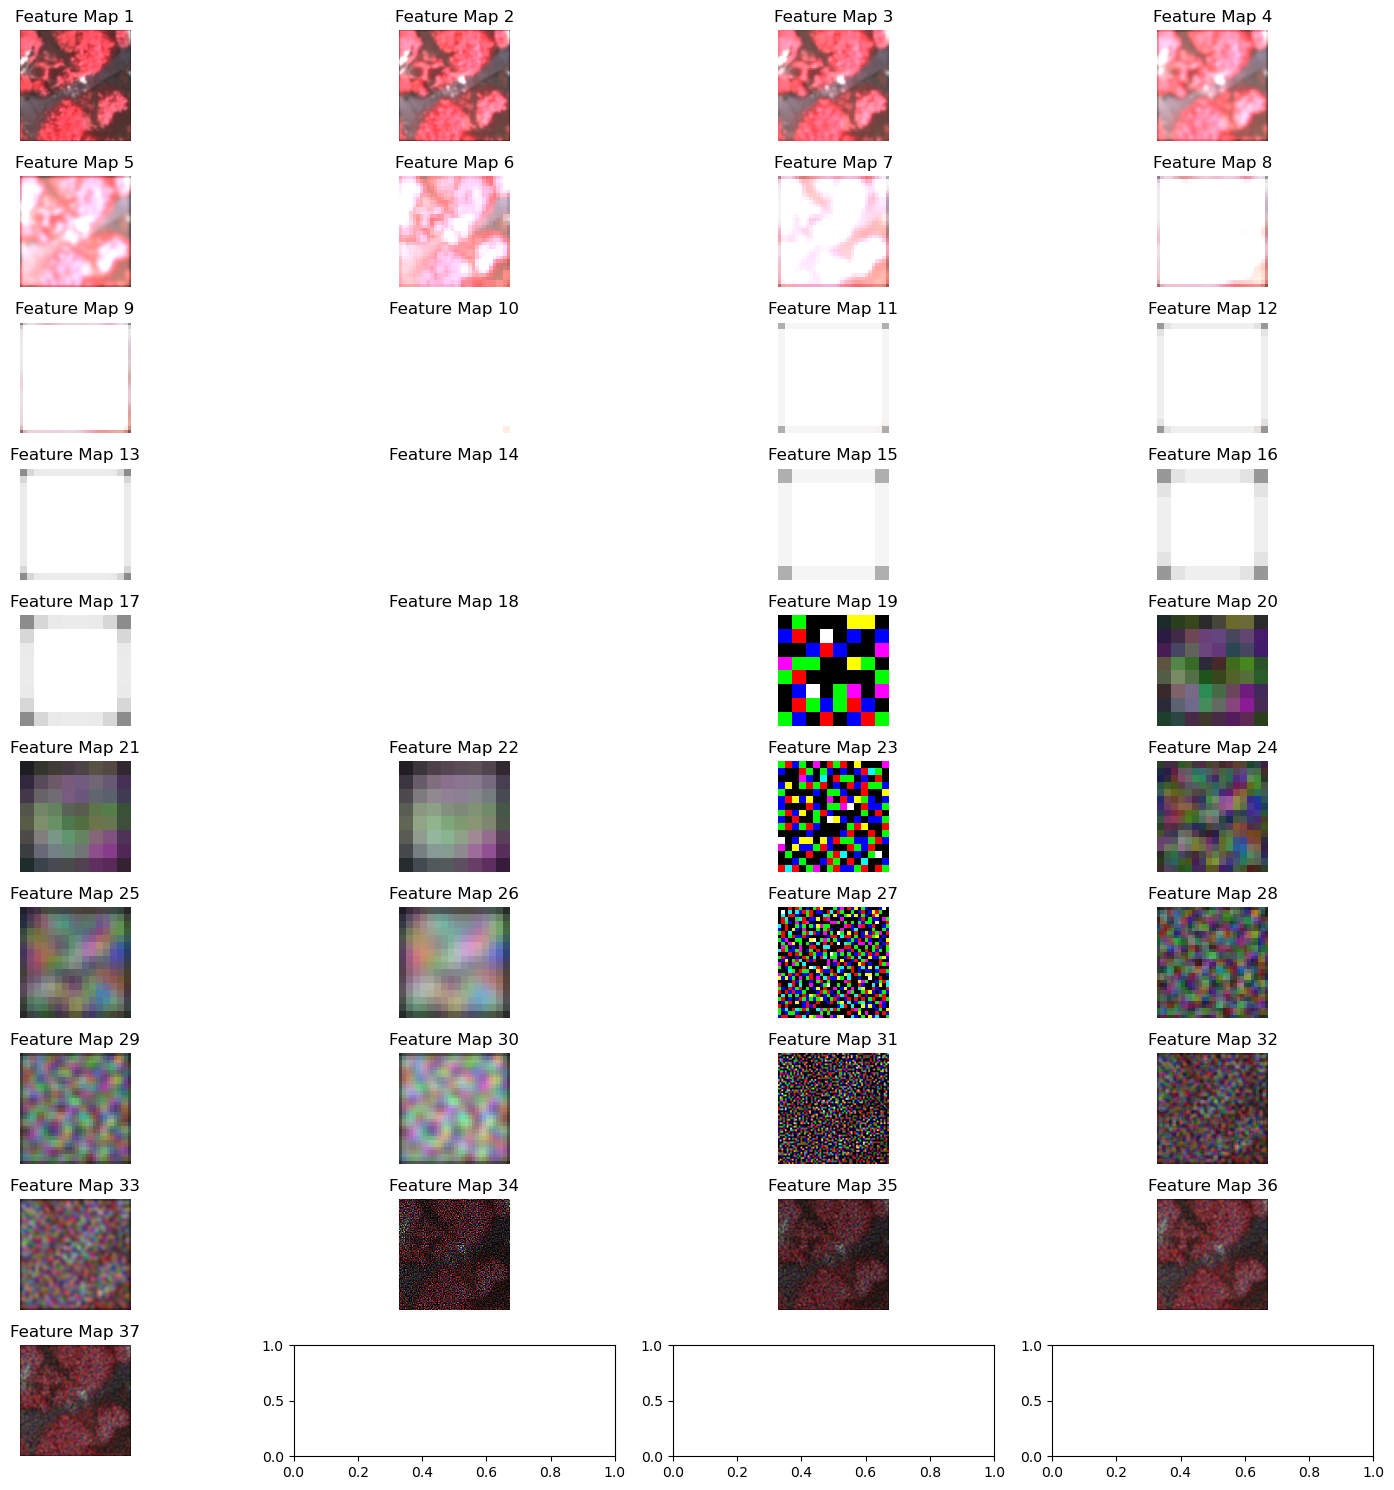

In [28]:
results = extract1(images_load[1000])
# List of feature maps to visualize
feature_maps = results

# Visualize feature maps
fig, axes = plt.subplots(len(feature_maps) // 4 + 1, 4, figsize=(15, 15))
axes = axes.flatten()
for i, feature_map in enumerate(feature_maps):
    axes[i].imshow(feature_map, cmap='gray')
    axes[i].set_title(f'Feature Map {i + 1}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [8]:
Feature_Map=[]
for i in range(len(tes_train)):
    for j in range(len(kernel)):
        kernel_index = j
        FM = extract1(tes_train[i])
        Feature_Map.append(FM)

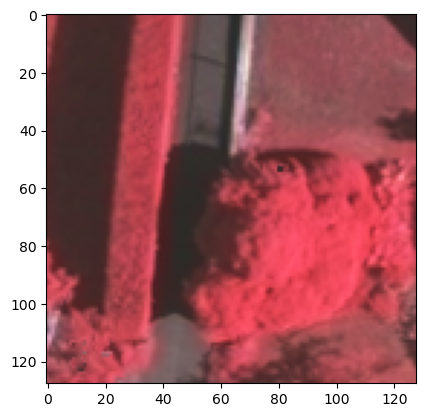

In [57]:
plt.imshow(np.array(tes_train[5]))

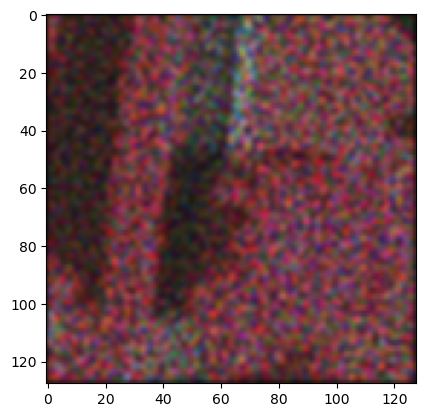

In [94]:
plt.imshow(Feature_Map[5][36])